In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
private_data = pd.read_excel('private_dataM.xlsx')
public_results = pd.read_excel('public_data_resultsM.xlsx')
public_register = pd.read_excel('public_data_registerM.xlsx')

**private_data**

cols = ['name', 'sex', 'evote', 'dob', 'zip', 'education', 'citizenship', 'marital_status', 'party']

len = 200

**public_register**

cols = ['name', 'sex', 'dob', 'zip', 'citizenship', 'marital_status', 'last_voted']

len = 1495

**public_results**

cols = ['Unnamed: 0', 'Red', 'Green', 'Invalid ballots', 'Total']

len = 6

In [3]:
# For question (A)
red = public_results['Red'][:4].sum()
green = public_results['Green'][:4].sum()
e_red = public_results['Red'][4]
e_green = public_results['Green'][4]
total_votes = public_results['Total'][:4].sum()
total_evotes = public_results['Total'][4]

print(f'Booth Results - Red: {red/total_votes*100:.2f}%, Green: {green/total_votes*100:.2f}%')
print(f'Electronic Results - Red: {e_red/total_evotes*100:.2f}%, Green: {e_green/total_evotes*100:.2f}%')

Booth Results - Red: 36.38%, Green: 62.15%
Electronic Results - Red: 33.97%, Green: 62.77%


In [4]:
# For question (A)
counts = private_data.groupby(['party', 'evote']).size().unstack(fill_value=0)
survey_red = counts.loc['Red', 0]
survey_ered = counts.loc['Red', 1]
survey_green = counts.loc['Green', 0]
survey_egreen = counts.loc['Green', 1]

total_e_votes = private_data['evote'].value_counts()[1]
total_booth_votes = private_data['evote'].value_counts()[0]

print(f'Survey Booth - Red: {survey_red/total_booth_votes*100:.2f}%, Green: {survey_green/total_booth_votes*100:.2f}%')
print(f'Survey Electronic - Red: {survey_ered/total_e_votes*100:.2f}%, Green: {survey_egreen/total_e_votes*100:.2f}%')

Survey Booth - Red: 36.57%, Green: 62.69%
Survey Electronic - Red: 34.85%, Green: 63.64%


In [ ]:
# For question (A)
from scipy.stats import chi2_contingency

vote_df = pd.DataFrame({
    'source': ['survey', 'survey', 'election', 'election', 'survey','survey', 'election', 'election'],
    'party': ['Red', 'Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Green'],
    'evote': [0, 1, 0, 1, 0, 1, 0, 1],
    'votes': [survey_red, survey_ered, red, e_red, survey_green, survey_egreen,  green, e_green]
})
# normalize votes
vote_df['votes_norm'] = (
    vote_df.groupby(['source', 'evote'])['votes']
    .transform(lambda x: x / x.sum() * 1000)  # scale each group to 1000
)

for evote_type in vote_df['evote'].unique():
    subset = vote_df[vote_df['evote'] == evote_type]
    contingency = pd.pivot_table(subset, values='votes_norm', index='source', columns='party')

    print(f"\nVote type: {'Electronic' if evote_type == 1 else 'Booth'}")
    print("Normalized contingency table:")
    print(contingency.round(2), "\n")

    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"Chi2 = {chi2:.2f}, p = {p:.4f}")
    if p < 0.05:
        print("→ Significant difference between survey and election proportions")
    else:
        print("→ No significant difference in proportions")


Vote type: Booth
Normalized contingency table:
party      Green     Red
source                  
election  630.79  369.21
survey    631.58  368.42 

Chi2 = 0.00, p = 1.0000
→ No significant difference in proportions

Vote type: Electronic
Normalized contingency table:
party      Green     Red
source                  
election  648.88  351.12
survey    646.15  353.85 

Chi2 = 0.01, p = 0.9357
→ No significant difference in proportions


In [ ]:
# For question (B)
# chi square test for categorical data

for col in ['sex', 'zip', 'education', 'citizenship', 'marital_status']:
    contingency = pd.crosstab(private_data['party'], private_data[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f'{col}: p = {p:.4f}')
    if p < 0.05:
        print(f'There is a significant association between party and {col}.')
    else:
        print(f'No significant association between party and {col}.')

sex: p = 0.0042
There is a significant association between party and sex.
zip: p = 0.3859
No significant association between party and zip.
education: p = 0.0976
No significant association between party and education.
citizenship: p = 0.9959
No significant association between party and citizenship.
marital_status: p = 0.0168
There is a significant association between party and marital_status.


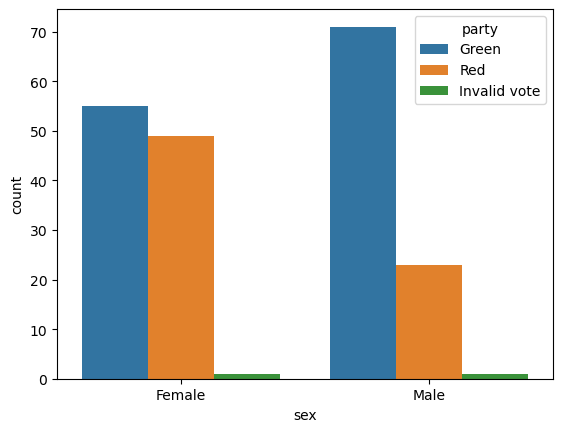

In [ ]:
# chi test gender follow-up

# counts = private_data.groupby(['party', 'sex']).size().unstack(fill_value=0)
# redF = counts.loc['Red', 'Female']
# redM = counts.loc['Red', 'Male']
# greenF = counts.loc['Green', 'Female']
# greenM = counts.loc['Green', 'Male']
# total_F = private_data['sex'].value_counts()[0]
# total_M = private_data['sex'].value_counts()[1]

# print(f'Female - Red: {redF/total_F*100:.2f}%, Female - Green: {greenF/total_F*100:.2f}%')
# print(f'Male - Red: {redM/total_M*100:.2f}%, Male - Green: {greenM/total_M*100:.2f}%')

sns.countplot(x='sex', hue='party', data=private_data)
plt.show()

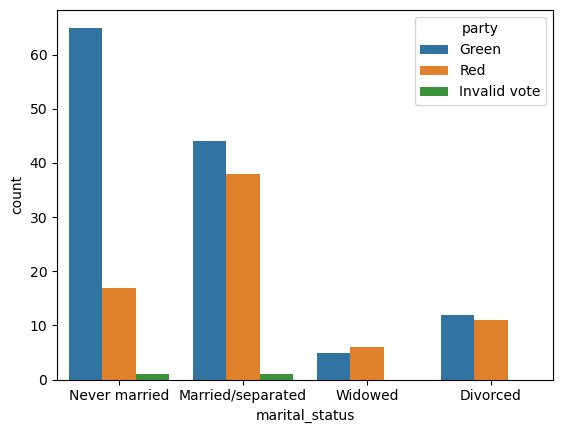

In [ ]:
# chi test marriage follow-up
sns.countplot(x='marital_status', hue='party', data=private_data)
plt.show()

ANOVA p = 0.0038
→ Significant difference in age across party preferences


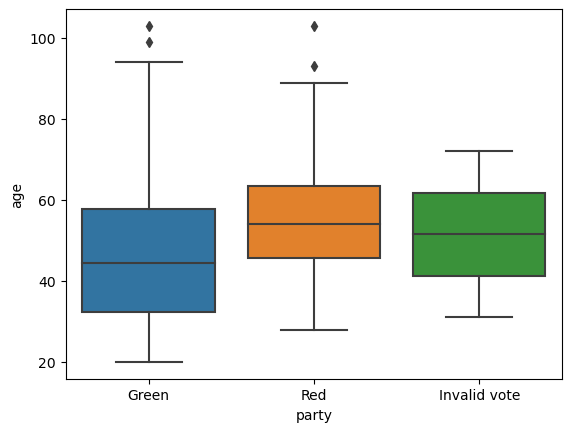

In [ ]:
# For question (B)
# anova for numerical data (age)
from scipy.stats import f_oneway

private_data['dob'] = pd.to_datetime(private_data['dob'], format='%d/%m/%Y')
today = pd.Timestamp.today()
private_data['age'] = (today - private_data['dob']).dt.days // 365

groups = [g["age"].dropna() for _, g in private_data.groupby("party")]
stat, p = f_oneway(*groups)

print(f"ANOVA p = {p:.4f}")
if p < 0.05:
    print("→ Significant difference in age across party preferences")
else:
    print("→ No significant difference in age across party preferences")

sns.boxplot(x='party', y='age', data=private_data)
plt.show()

In [ ]:
# For question (C)
# chi test for categorical data
for col in ['sex', 'zip', 'education', 'citizenship', 'marital_status']:
    contingency = pd.crosstab(private_data['evote'], private_data[col])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f'{col}: p = {p:.4f}')
    if p < 0.05:
        print(f'There is a significant association between voting method and {col}.')
    else:
        print(f'No significant association between voting method and {col}.')

sex: p = 0.7291
No significant association between voting method and sex.
zip: p = 0.2218
No significant association between voting method and zip.
education: p = 0.1614
No significant association between voting method and education.
citizenship: p = 0.2678
No significant association between voting method and citizenship.
marital_status: p = 0.0271
There is a significant association between voting method and marital_status.


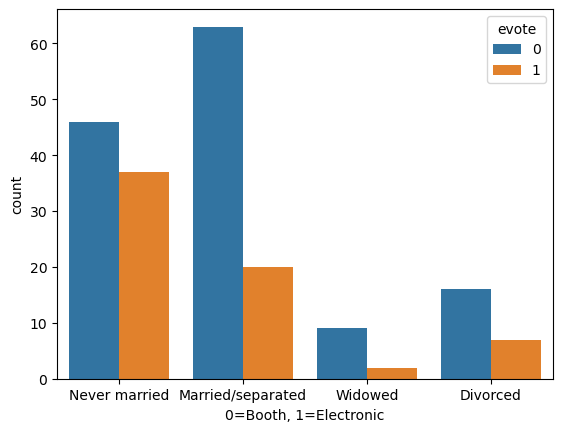

In [ ]:
# chi test marriage follow-up
marr = sns.countplot(x='marital_status', hue='evote', data=private_data)
marr.set(xlabel = '0=Booth, 1=Electronic')
plt.show()

ANOVA p = 0.0056
→ Significant difference in age across vote preferences


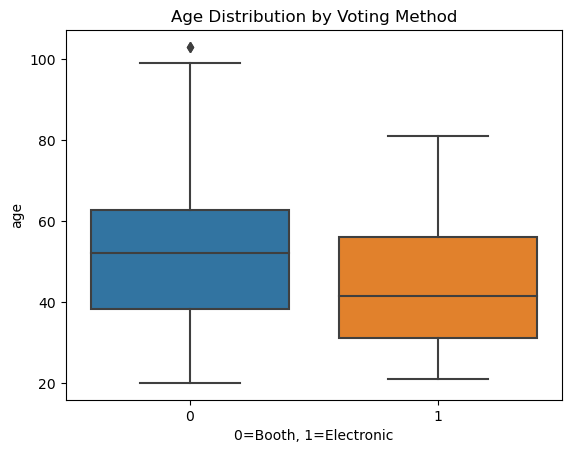

In [ ]:
# For question (C)
# anova for numerical data (age)
groups = [g["age"].dropna() for _, g in private_data.groupby("evote")]
stat, p = f_oneway(*groups)

print(f"ANOVA p = {p:.4f}")
if p < 0.05:
    print("→ Significant difference in age across vote method preferences")
else:
    print("→ No significant difference in age across vote method preferences")

plot = sns.boxplot(x='evote', y='age', data=private_data)
plot.set_title('Age Distribution by Voting Method')
plot.set(xlabel = '0=Booth, 1=Electronic')
plt.show()